In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.preprocessing import StandardScaler


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model


In [ ]:
!pip install plotly
import plotly.graph_objects as go

In [ ]:
import json as js
import csv
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data=pd.read_json('/content/drive/MyDrive/loan_approval_dataset.json')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [ ]:
data

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
#DATA=data[-200:]
#DATA
#DATA=data.set_index('Risk_Flag')

In [ ]:
#fig = go.Figure(data=[go.Candlestick(x=DATA['Age'],open=DATA['Profession'],high=DATA['Income'],low=DATA['CITY'],close=DATA['Married/Single'])])
#fig.show()

In [ ]:
{column:list(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Married/Single': ['single', 'married'],
 'House_Ownership': ['rented', 'norent_noown', 'owned'],
 'Car_Ownership': ['no', 'yes'],
 'Profession': ['Mechanical_engineer',
  'Software_Developer',
  'Technical_writer',
  'Civil_servant',
  'Librarian',
  'Economist',
  'Flight_attendant',
  'Architect',
  'Designer',
  'Physician',
  'Financial_Analyst',
  'Air_traffic_controller',
  'Politician',
  'Police_officer',
  'Artist',
  'Surveyor',
  'Design_Engineer',
  'Chemical_engineer',
  'Hotel_Manager',
  'Dentist',
  'Comedian',
  'Biomedical_Engineer',
  'Graphic_Designer',
  'Computer_hardware_engineer',
  'Petroleum_Engineer',
  'Secretary',
  'Computer_operator',
  'Chartered_Accountant',
  'Technician',
  'Microbiologist',
  'Fashion_Designer',
  'Aviator',
  'Psychologist',
  'Magistrate',
  'Lawyer',
  'Firefighter',
  'Engineer',
  'Official',
  'Analyst',
  'Geologist',
  'Drafter',
  'Statistician',
  'Web_designer',
  'Consultant',
  'Chef',
  'Army_officer',
  'Surgeon',
  

In [ ]:
{column:len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Married/Single': 2,
 'House_Ownership': 3,
 'Car_Ownership': 2,
 'Profession': 51,
 'CITY': 317,
 'STATE': 29}

In [ ]:
#checking the number of none values
data.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Encoding

In [ ]:
#encoding
def binary_encoding(df,columns_with_pos_values):
  df=df.copy()
  for column, positive_value in columns_with_pos_values:
    df[column]=df[column].apply(lambda x:1 if x==positive_value else 0)
  return df

def ordinal_encoding(df, columns_with_ordered_values):
  df=df.copy()
  for column, ordered_values in columns_with_ordered_values.items():
    df[column]=df[column].apply(lambda x: ordered_values.index(x))
  return df

def one_hot_encoding(df, columns_with_categories):
  df=df.copy()

  for column, prefix in columns_with_categories:
    dummies=pd.get_dummies(df[column], prefix=prefix)
    df=pd.concat([df, dummies], axis=1)
    df=df.drop(column, axis=1)
  return df


Preprocessing

In [ ]:

def preprossessing(df):
  df=df.copy()
  df=df.drop('Id', axis=1)


  #binay encodes the Married/Single and Car_Ownership columns
  df=binary_encoding( df, columns_with_pos_values= [('Married/Single', 'Married'), ('Car_Ownership', 'Yes')])

  # ordinal encodes the House_Ownership column
  df=ordinal_encoding(df, columns_with_ordered_values={'House_Ownership': ['norent_noown','rented', 'owned']})

  # one_hot encodes the Profession, CITY, STATE columns
  df=one_hot_encoding(df, columns_with_categories=[('Profession', 'P'),
   ('CITY', 'C'),
    ('STATE', 'S')])
  # Split df into X and y
  y = df['Risk_Flag'].copy()
  x = df.drop('Risk_Flag', axis=1).copy()

  # Train-test split
  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)

  # Scale X with a standard scaler
  scaler = StandardScaler()
  scaler.fit(x_train)

  x_train = pd.DataFrame(scaler.transform(x_train), columns=x.columns)
  x_test = pd.DataFrame(scaler.transform(x_test), columns=x.columns)

  return x_train, x_test,  y_train, y_test

  return x,y

Model Evaluation

In [ ]:
def evaluate_model(model, x_test, y_test, classification_threshold=0.75):
  y_true = np.array(y_test)

  y_pred = (model.predict_proba(x_test) >= classification_threshold).astype(int)
  y_pred = list(map(lambda x: x[1],y_pred))

  print("Test Accuracy: {:.2f}%".format(accuracy_score(y_true, y_pred) * 100))

  cm = confusion_matrix(y_true, y_pred)
  clr = classification_report(y_true, y_pred, target_names=["Not Risky", "Risky"])




  plt.figure(figsize=(8, 8))
  sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Reds', cbar=False)

  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.xticks(np.arange(2) + 0.5, ["Low Risk", "High Risk"])
  plt.yticks(np.arange(2) + 0.5, ["Low Risk", "High Risk"])
  plt.title("Confusion Matrix")

  plt.show()


  print("Classification Report:\n----------------------\n", clr)

  # plot roc curve
  x, y, classification_threshold=roc_curve(y_true,y_pred)
  plt.plot(x, y)
  plt.title('ROC Curve')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.grid()
  skip=10
  for i in range (0,len(classification_threshold),skip):
    plt.text(x[i],y[i],classification_threshold[i])

  plt.show()


Processing

In [ ]:
x_train, x_test, y_train, y_test = preprossessing(data)

In [ ]:
x_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,P_Air_traffic_controller,P_Analyst,...,S_Punjab,S_Rajasthan,S_Sikkim,S_Tamil_Nadu,S_Telangana,S_Tripura,S_Uttar_Pradesh,S_Uttar_Pradesh[5],S_Uttarakhand,S_West_Bengal
0,1.389398,1.058151,-1.012585,0.0,-3.641854,0.0,-0.639027,0.003521,6.851847,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
1,0.134256,-0.055635,1.319989,0.0,-0.079981,0.0,1.554998,0.003521,-0.145946,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
2,0.696025,-0.700458,1.653214,0.0,-0.079981,0.0,-0.364774,0.718280,-0.145946,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
3,-0.376657,1.702975,-0.346135,0.0,-0.079981,0.0,-0.364774,0.718280,-0.145946,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
4,0.880181,-0.231496,-1.345810,0.0,-0.079981,0.0,-1.187533,0.003521,-0.145946,-0.138414,...,-0.137689,5.137247,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176395,-0.422761,0.354707,0.986764,0.0,-0.079981,0.0,1.280745,1.433038,-0.145946,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
176396,-0.811517,-1.345282,1.153376,0.0,-0.079981,0.0,0.457986,-0.711237,-0.145946,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
176397,-1.621824,0.002986,-0.012911,0.0,-0.079981,0.0,-0.639027,-0.711237,-0.145946,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,-0.356307,-0.054059,-0.086165,-0.319736
176398,-0.361533,1.644354,0.486927,0.0,-0.079981,0.0,1.280745,-0.711237,-0.145946,-0.138414,...,-0.137689,-0.194657,-0.049144,-0.265149,-0.175228,-0.057979,2.806566,-0.054059,-0.086165,-0.319736


In [ ]:
y_train

131306    0
8305      0
124918    0
223199    0
240781    0
         ..
192476    0
17730     0
28030     0
15725     1
249342    0
Name: Risk_Flag, Length: 176400, dtype: int64

TRAINING

In [ ]:
y_train.value_counts()

Risk_Flag
0    154621
1     21779
Name: count, dtype: int64

In [ ]:
model = LogisticRegression(
    class_weight={0: 1,1: 1.5})

model.fit(x_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 1.5})

RESULT

When threshold is 0.5

Test Accuracy: 87.81%


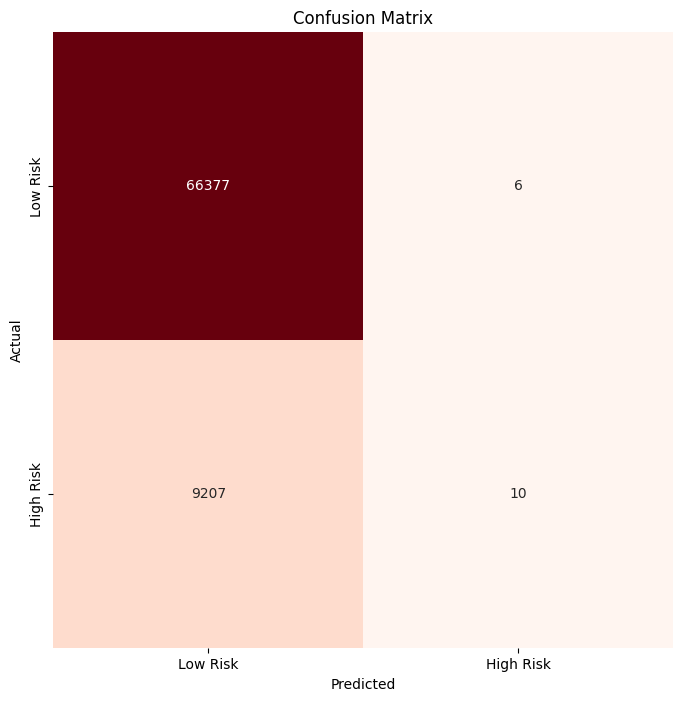

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.88      1.00      0.94     66383
       Risky       0.62      0.00      0.00      9217

    accuracy                           0.88     75600
   macro avg       0.75      0.50      0.47     75600
weighted avg       0.85      0.88      0.82     75600



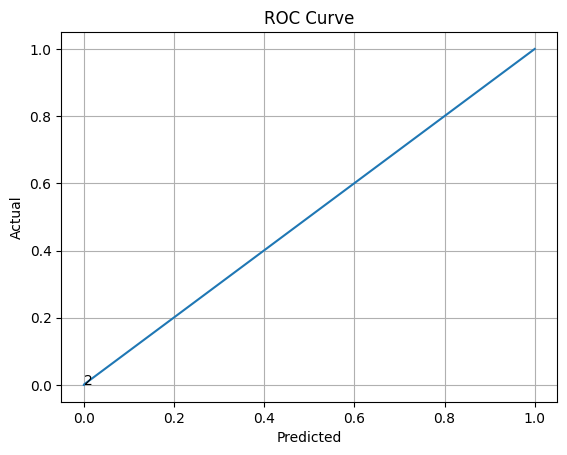

In [ ]:
evaluate_model(model, x_test, y_test, classification_threshold=0.5)

When threshold is 0.35

Test Accuracy: 87.02%


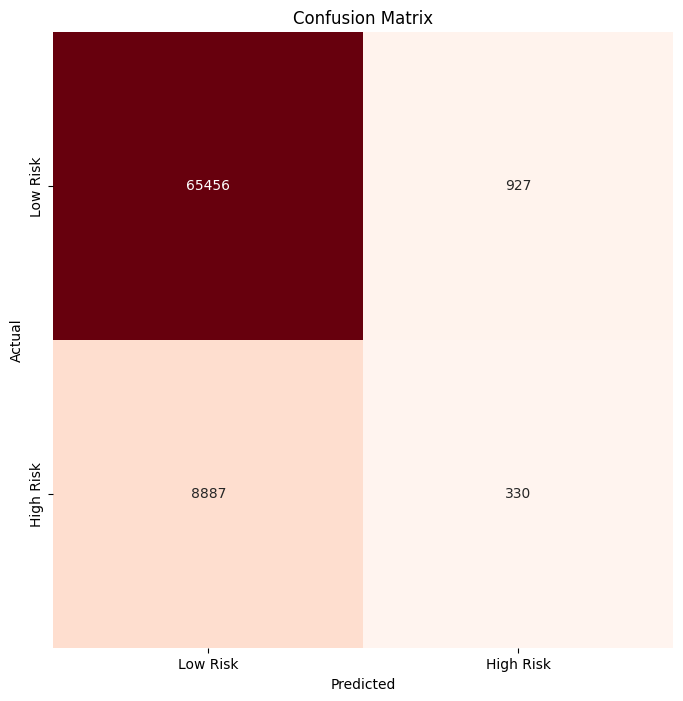

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.88      0.99      0.93     66383
       Risky       0.26      0.04      0.06      9217

    accuracy                           0.87     75600
   macro avg       0.57      0.51      0.50     75600
weighted avg       0.81      0.87      0.82     75600



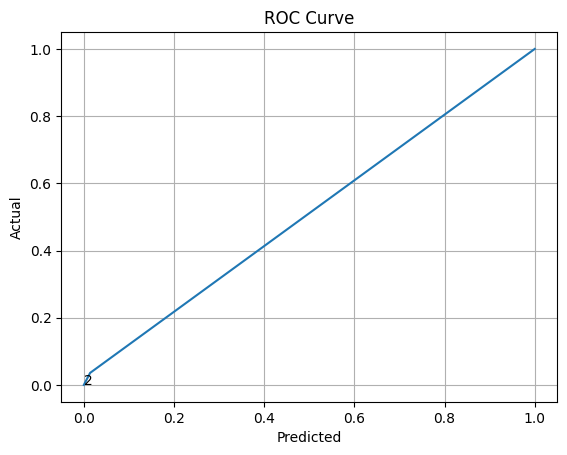

In [ ]:
evaluate_model(model, x_test, y_test, classification_threshold=0.35)

When threshold is 0.2

Test Accuracy: 68.35%


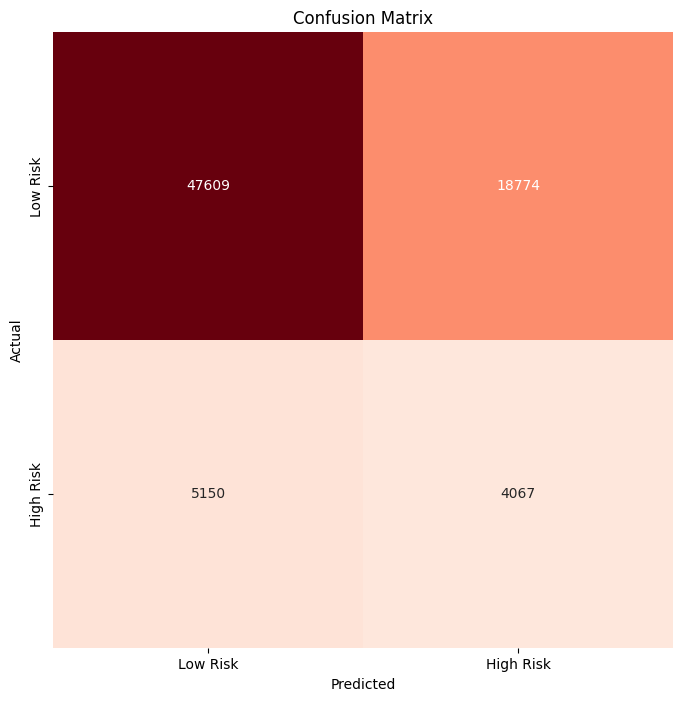

Classification Report:
----------------------
               precision    recall  f1-score   support

   Not Risky       0.90      0.72      0.80     66383
       Risky       0.18      0.44      0.25      9217

    accuracy                           0.68     75600
   macro avg       0.54      0.58      0.53     75600
weighted avg       0.81      0.68      0.73     75600



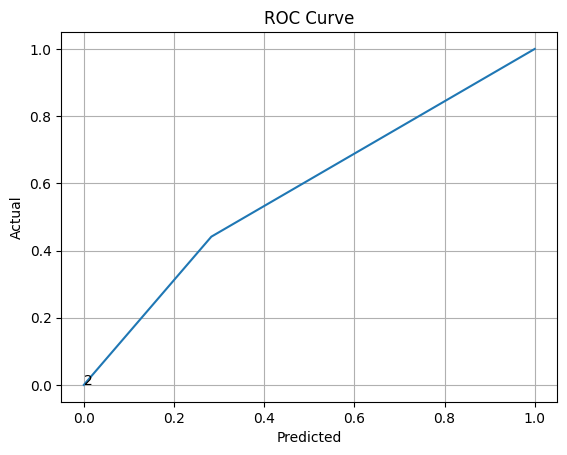

In [ ]:
evaluate_model(model, x_test, y_test, classification_threshold=0.2)